<a href="https://colab.research.google.com/github/mitrish/CodingNinjas/blob/master/EVA_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

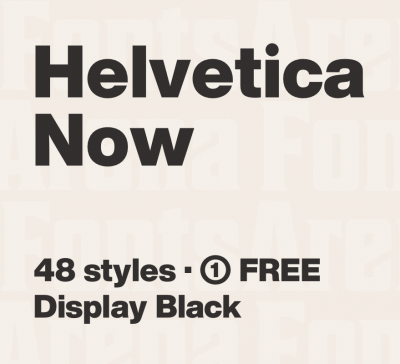

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

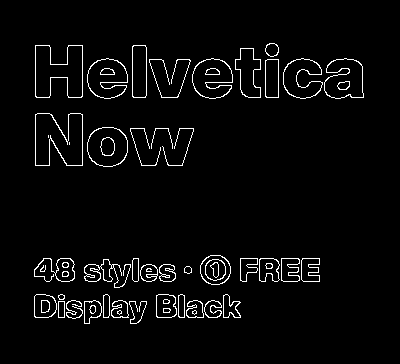

In [5]:
cv2_imshow(edges)

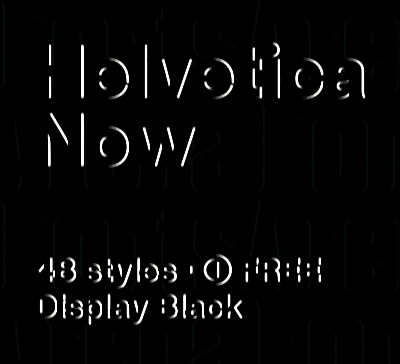

In [74]:
# Verical Edge detector

#STEP - 1: Define a mask 
kernel_vertical = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])
# When we apply the mask on a image, it highlights the vertical edges on the image
dst = cv2.filter2D(image,-1,kernel_vertical)
cv2_imshow(dst)

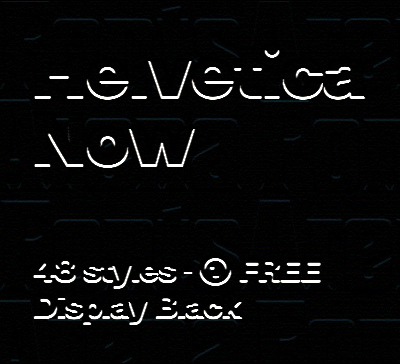

In [64]:
# Horizontal Edge Detector

kernel_horizontal = np.float32([[-1,-5,-1],[0,0,0],[1,5,1]])
dst_horizontal = cv2.filter2D(image, -1, kernel_horizontal)
cv2_imshow(dst_horizontal)

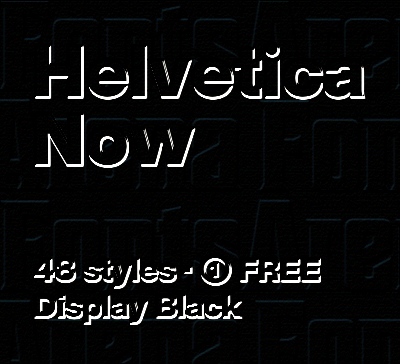

In [68]:
# Diagonal Edge Detector

#Diagonal Edges are neither horizontal or vertical, they can be made by adding
#horizantal and vertical edges 
kernel_diagonal = kernel_horizontal + kernel_vertical
dst_horizontal = cv2.filter2D(image, -1, kernel_diagonal)
cv2_imshow(dst_horizontal)

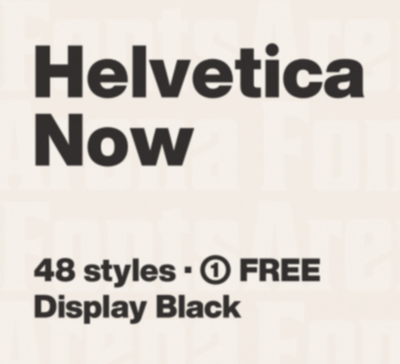

In [71]:
#Blur kernel
# The Blur kernel de - emphasizes differences in adjacent pixel values
kernel_blur = np.float32([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])
dst_blur = cv2.filter2D(image, -1, kernel_blur)
cv2_imshow(dst_blur)

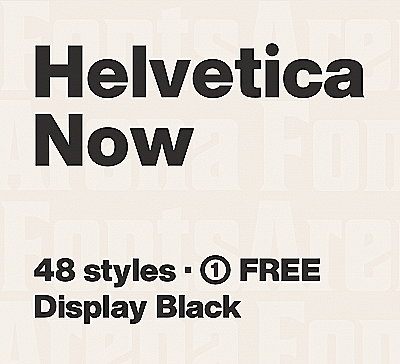

In [72]:
# Sharpen Image
# The sharpen kernel emphasizes differences in adjacent pixels
kernel_sharpen = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])
dst_sharpen = cv2.filter2D(image, -1, kernel_sharpen)
cv2_imshow(dst_sharpen)

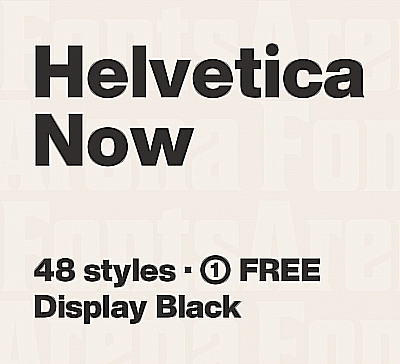

In [83]:
# Identity Function

# The kernel has to be such that, the kernel negates any change in the convolution
kernel_identity = np.float32([[-1,1,-1],[1,1,1],[-1,1,-1]])
dst_identity = cv2.filter2D(image, -1, kernel_identity)
cv2_imshow(dst_identity)